This notebook is based on code written by:

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [29]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
print("The dimensions of X are", X.shape)
Xm = np.mean(X, axis=0)
Xs = np.std(X, axis=0)
Xv = np.var(X, axis=0)
print("The mean is", Xm)
print("The standard deviation is", Xs)
print("The variance is", Xv)
Cx = np.cov(X.T, bias=True)
print("The co-variance matrix is\n", Cx)

The dimensions of X are (200, 2)
The mean is [ 0.03351168 -0.00408072]
The standard deviation is [0.823873   0.31358832]
The variance is [0.67876672 0.09833763]
The co-variance matrix is
 [[0.67876672 0.22978007]
 [0.22978007 0.09833763]]


In [30]:
Xn = (X-Xm)/Xs
print("Mean after normalisation", np.mean(Xn, axis=0))
print("Standard deviation after normalisation", np.std(Xn, axis=0))
print("Variance after normalisation", np.var(Xn, axis=0))
print("Total Variance after normalisation", np.sum(np.var(Xn, axis=0)))

Mean after normalisation [-3.10862447e-17  0.00000000e+00]
Standard deviation after normalisation [1. 1.]
Variance after normalisation [1. 1.]
Total Variance after normalisation 1.9999999999999996


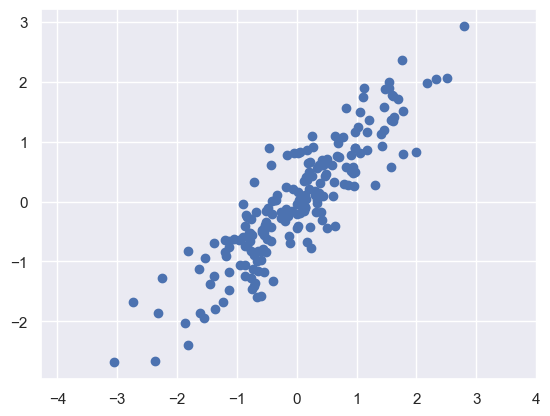

In [31]:
plt.scatter(Xn[:, 0], Xn[:, 1])
plt.axis('equal');

In [32]:
Xn[:, 1]

array([-0.52930205,  1.89733254, -1.27081481, -1.68531797, -1.57782195,
       -0.8458552 , -1.06581723,  1.89879066, -0.30123408, -1.28222104,
        1.08727939, -0.55259871, -1.17903204,  0.85701393,  0.61393769,
       -0.40665182,  1.37004701,  0.13769324,  1.57152337,  0.49812631,
        1.51619656,  0.11867212, -1.16262211,  2.37421615, -0.51321634,
       -0.17902923, -0.66234357, -0.18288752,  0.24671992,  0.20745408,
        0.65005638,  1.74053631, -0.10337254, -1.17585151, -1.12727528,
       -0.62875987, -1.60048492,  0.80870034, -0.46738799, -0.28713345,
        0.01091688, -1.33286074, -0.8173693 ,  0.6632745 ,  0.60942028,
       -0.41348599,  1.75860551, -1.24562189, -0.319482  , -0.20966962,
       -2.68023549,  1.88086993,  0.36611991, -0.99386861,  1.99086889,
        0.57799319,  0.42722614, -0.57187536,  0.11514786, -1.45744857,
        0.77968998, -0.34809421,  0.14242791,  1.17189447,  0.28795326,
        0.2666139 ,  0.28038493, -0.69444838,  0.81848396,  1.50

In [33]:
C = np.cov(Xn.T, bias=True)
print("Covariance matrix Dimensionality is: ", C.shape)
print("Covariance matrix is\n", C)

Covariance matrix Dimensionality is:  (2, 2)
Covariance matrix is
 [[1.         0.88938995]
 [0.88938995 1.        ]]


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [35]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [36]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


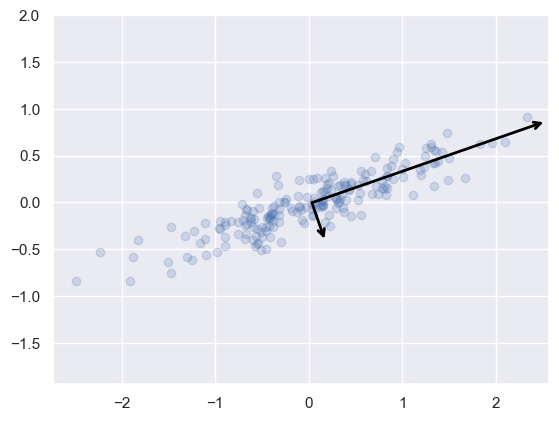

In [37]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    color="black",
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ - v) # used -v here, instead of +v used in orginal code to get same plot
plt.axis('equal');

In [38]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


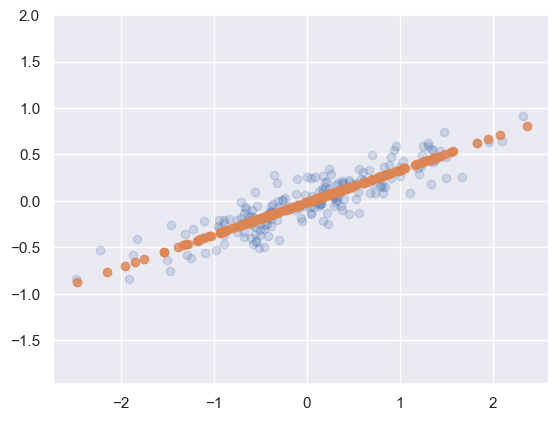

In [39]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');
plt.savefig("pca_example.pdf")

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [15]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


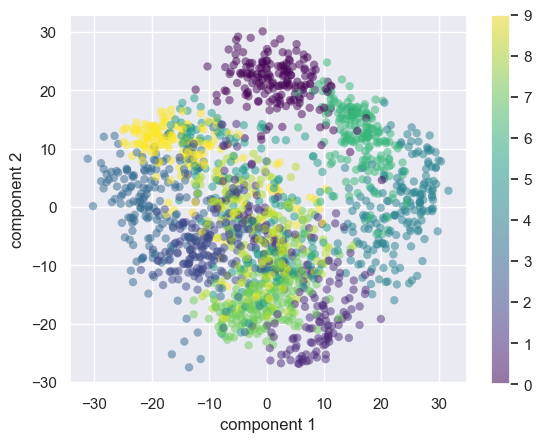

In [16]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap='viridis') # spectral is not supported so used inferno
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

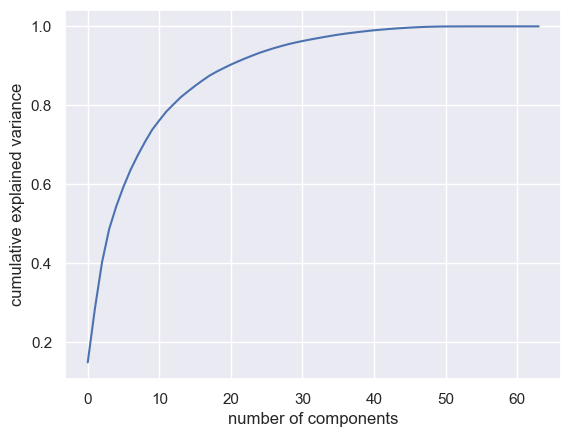

In [17]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

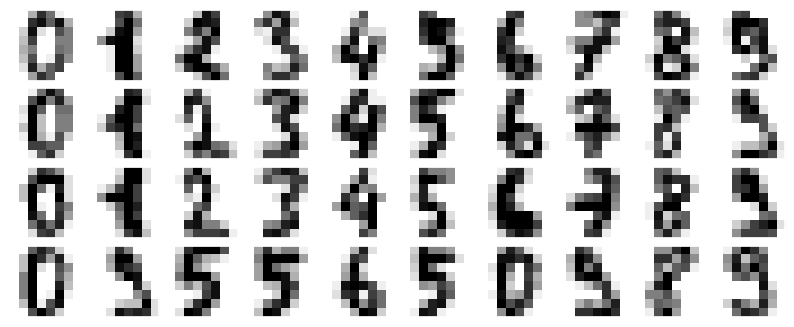

In [18]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

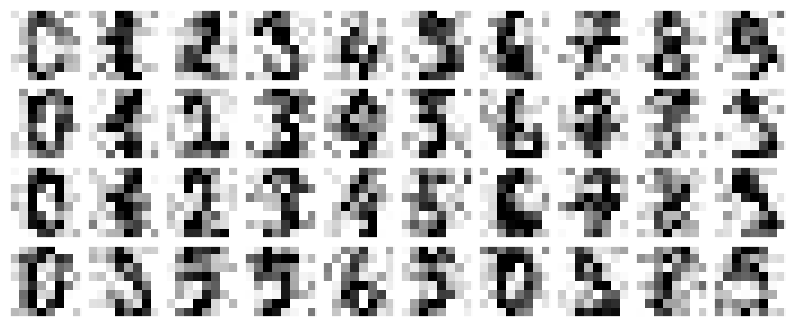

In [19]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [20]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

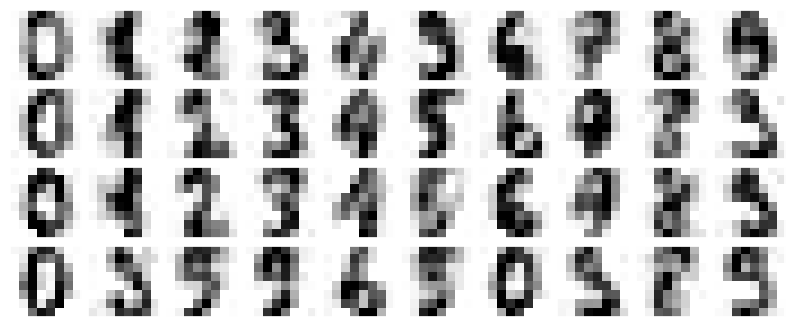

In [21]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [22]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [23]:
from sklearn.decomposition import PCA as RandomizedPCA # this line was changed from the orginal as the original is deprecated
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(n_components=150)

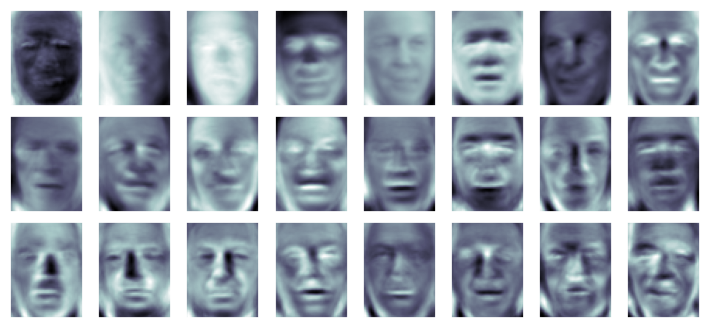

In [24]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

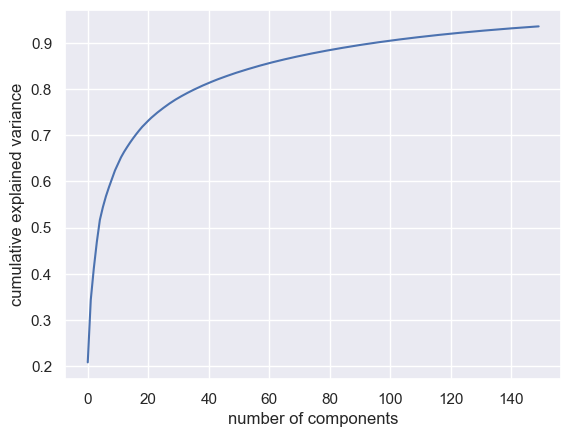

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [26]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data) # originally ~3000 features
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

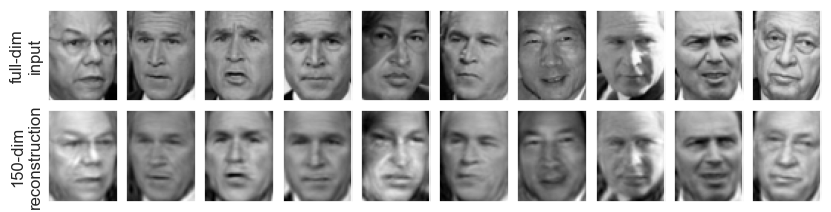

In [27]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');